# Exceptions to the Buy American Act

## Overview

The following dataset was collected from the Federal Business Opportunities website, which is a searchable collection of federal contract opportunities. It includes information on contract requirements and awards. There is an additional dataset of information collected for the exceptions to the Buy American Act (BAA), signed by President Hoover in 1933. This act required the United States government to prefer purchases from American companies.

## Features

Features of the dataset include information about the funding agency, country origin, dates signed and completed, North American Industry Classification System information, product information, vendor information, and contract value information.

Exceptions to the BAA can provide interesting insight for a few reasons. How much federal money is spent outside of the United States? Are there any trends to this, in terms of which countries or industries? What agencies frequently appear on this list?

A few basic summary statistics and visualizations will tell us a little bit about the contracts. We will drop entries with negative values for 'Action_Obligation' as it is unclear what a negative value indicates.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_palette('winter')

buy = pd.read_excel('../../_Datasets/Buy_American_Act.xls')
buy.columns = ['Funding_Agency', 'Funding_Agency_ID',
       'Place_Manufacture_Desc',
       'Country_Origin_Code', 'PIID', 'Date_Signed',
       'Completion_Date', 'NAICS_Code', 'NAICS_Description',
       'Prod_Service_Code', 'Prod_Service_Desc',
       'Vendor_Name', 'Vendor_City', 'Vendor_State', 'Vendor_Country',
       'DUNS_No', 'Contract_Type', 'Award_IDV_Type',
       'Total_Contract_Val',
       'Action_Obligation']

### Dataset - quick look

In [2]:
buy.head(3)

,Funding_Agency,Funding_Agency_ID,Place_Manufacture_Desc,Country_Origin_Code,PIID,Date_Signed,Completion_Date,NAICS_Code,NAICS_Description,Prod_Service_Code,Prod_Service_Desc,Vendor_Name,Vendor_City,Vendor_State,Vendor_Country,DUNS_No,Contract_Type,Award_IDV_Type,Total_Contract_Val,Action_Obligation
0,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2013-08-30,2014-08-31,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,0.00,6404.00
1,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2013-09-18,2013-09-30,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,2047.70,2047.70
2,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2015-05-20,2014-08-31,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,2587.52,2587.52


In [3]:
buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59535 entries, 0 to 59534
Data columns (total 20 columns):
Funding_Agency            59535 non-null object
Funding_Agency_ID         59535 non-null object
Place_Manufacture_Desc    59535 non-null object
Country_Origin_Code       59176 non-null object
PIID                      59535 non-null object
Date_Signed               59535 non-null datetime64[ns]
Completion_Date           59535 non-null datetime64[ns]
NAICS_Code                59502 non-null float64
NAICS_Description         59502 non-null object
Prod_Service_Code         59531 non-null object
Prod_Service_Desc         59531 non-null object
Vendor_Name               59526 non-null object
Vendor_City               59530 non-null object
Vendor_State              44843 non-null object
Vendor_Country            59463 non-null object
DUNS_No                   59535 non-null int64
Contract_Type             59463 non-null object
Award_IDV_Type            59535 non-null object
Total_Contr

In [4]:
buy = buy[buy['Action_Obligation'] >=0]

#### Notes: info() and head()
Let's take a look at a table summary using info() and head() for a better idea of feature size and how many missing values exist.

Empty values and NaN do not seem to be a major issue when using the info() method. Vendor state has many missing values, but it is not likely critical for our questions. Without several numeric values, the describe() method won't tell much.

In [5]:
for col in buy.columns:
    print("{}\n".format(str(col)), len(buy[col].unique())) # There is probably a built-in for this

Funding_Agency
 202
Funding_Agency_ID
 200
Place_Manufacture_Desc
 5
Country_Origin_Code
 188
PIID
 46692
Date_Signed
 1653
Completion_Date
 3152
NAICS_Code
 706
NAICS_Description
 698
Prod_Service_Code
 555
Prod_Service_Desc
 561
Vendor_Name
 6968
Vendor_City
 2707
Vendor_State
 54
Vendor_Country
 105
DUNS_No
 6642
Contract_Type
 14
Award_IDV_Type
 4
Total_Contract_Val
 37963
Action_Obligation
 38037


#### Notes: Uniques
We also want to know how many unique values exist for each feature to get an idea of how much variation the dataset holds. The real variety of the data set is in its continuous variables, not its discrete ones - such as in the values associated with dollar amounts.

### Violin plot - contract values

C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


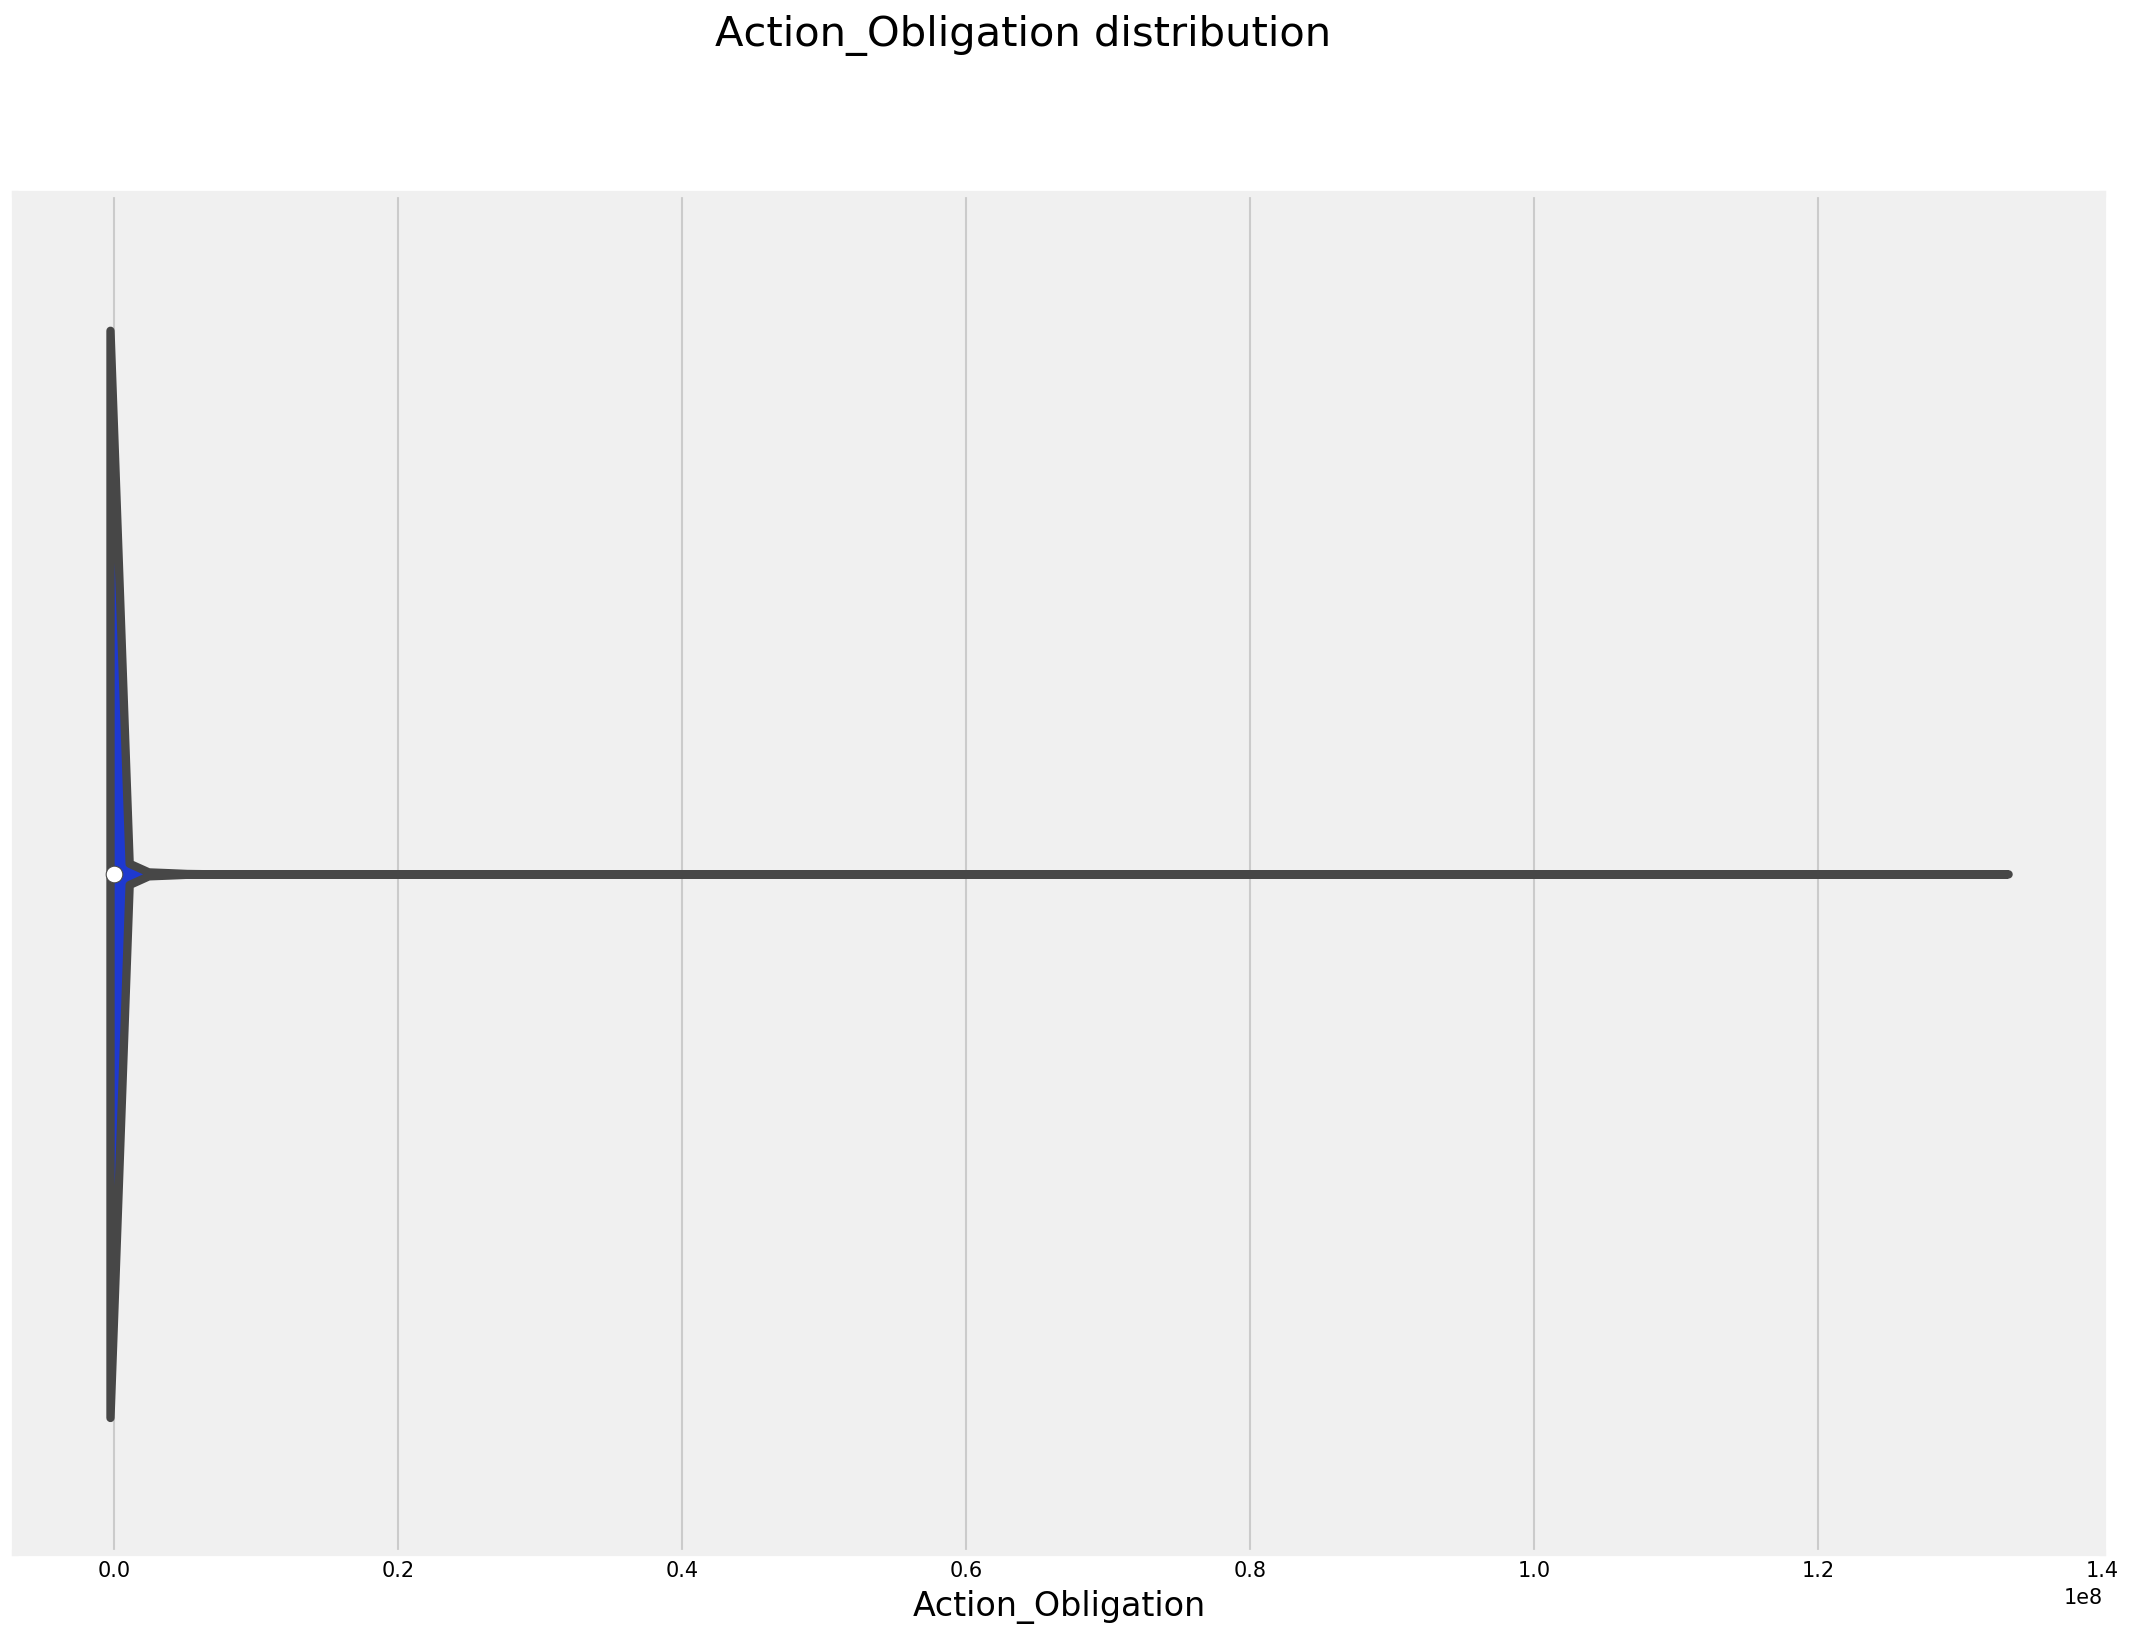

count    5.634800e+04
mean     6.968951e+04
std      1.205059e+06
min      0.000000e+00
25%      5.991900e+02
50%      5.621475e+03
75%      1.941032e+04
max      1.331093e+08
Name: Action_Obligation, dtype: float64


In [6]:
fig, ax = plt.subplots(1, 1, figsize=(16,12), dpi=150)
fig.suptitle('Action_Obligation distribution', size=20, ha='center')
ax = sns.violinplot(x=buy['Action_Obligation'], alpha=0.8)
plt.xlabel('Action_Obligation', size=16)
plt.show()
print(buy['Action_Obligation'].describe())

#### Notes: Violin plot
The violinplot above is not doing a good job of telling us much. The count around zero is overwhelmingly large. Very large outliers are likely skewing the information and spreading out the values too much for insight. The describe() method trick on this column confirms this is the case.

### Bar plot - total annual contract values
-------- Notes about the barplot purpose -------------

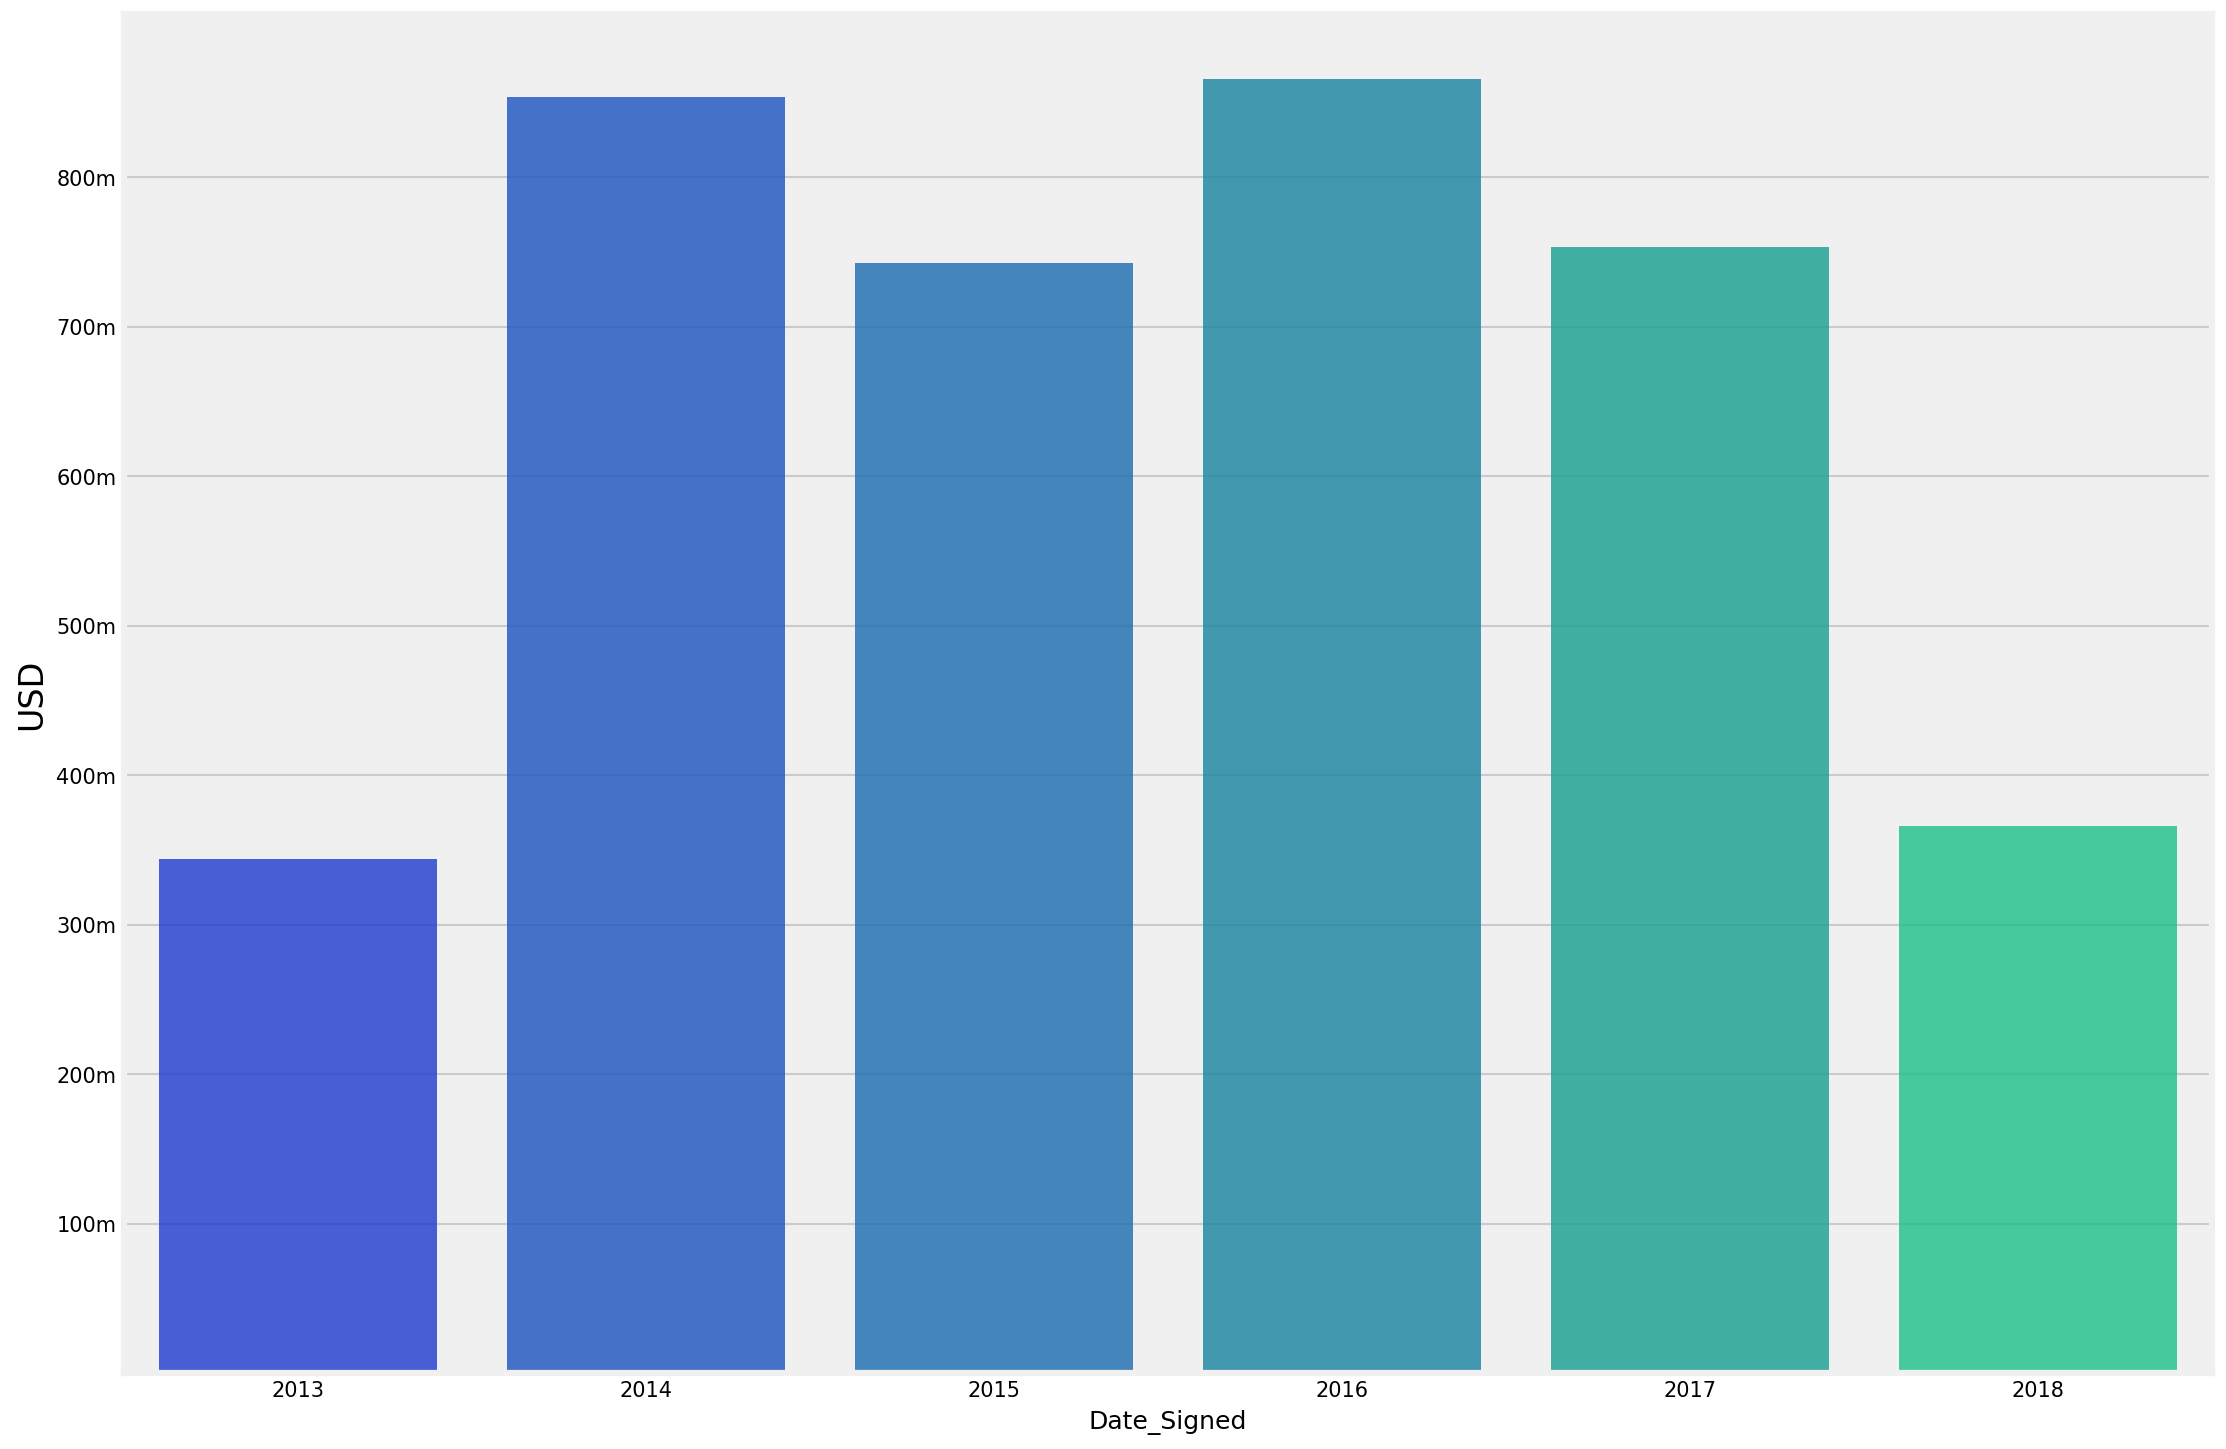

First contract date: 2013-08-01 00:00:00
Final contract date: 2018-07-31 00:00:00


In [7]:
date_val = pd.DataFrame(buy[['Action_Obligation', 'Date_Signed']])
date_val.index = date_val['Date_Signed']
del date_val['Date_Signed']
dateval_ser = date_val['Action_Obligation']

fig, ax = plt.subplots(1, 1, figsize=(16,12), dpi=150)
ax = sns.barplot(x=dateval_ser.resample('Y').sum().index, y=dateval_ser.resample('Y').sum().values, alpha=0.8)
plt.xticks(np.arange(6), [2013, 2014, 2015, 2016, 2017, 2018])
plt.ylabel('USD', size=16)
plt.yticks(np.arange(10**8, 9*10**8, 10**8), ['100m', '200m', '300m', '400m', '500m', '600m', '700m', '800m'])
plt.show()
print('First contract date: {}'.format(min(buy['Date_Signed'])))
print('Final contract date: {}'.format(max(buy['Date_Signed'])))

#### Notes: Bar plot
We can take the annual sum of total contract action obligations to see if there are major spending differences over time or obvious spikes. The first and last year of contracts are not for complete 12-month cycles, therefore we can expect their total spendings to be considerably less, as queried above.
## Deeper questions

As mentioned, the vast majority of this dataset revolves around categorical variables, such as agency, origin country, or product description. These features will provide the most information about the exceptions to this federal spending law. 

This report will pose three general questions about the data and its trends. During the analysis of the features, these questions will be refined to try and discover more specific information. 

1. Are some foreign countries much more prevalent on this list? Is the reason obvious?
2. Do any federal agencies consistently appear on the list to award contracts overseas?
3. What can we learn about the industries and companies awarded on this list? 

#### Are some foreign countries much more prevalent on this list? Is the reason obvious?

C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


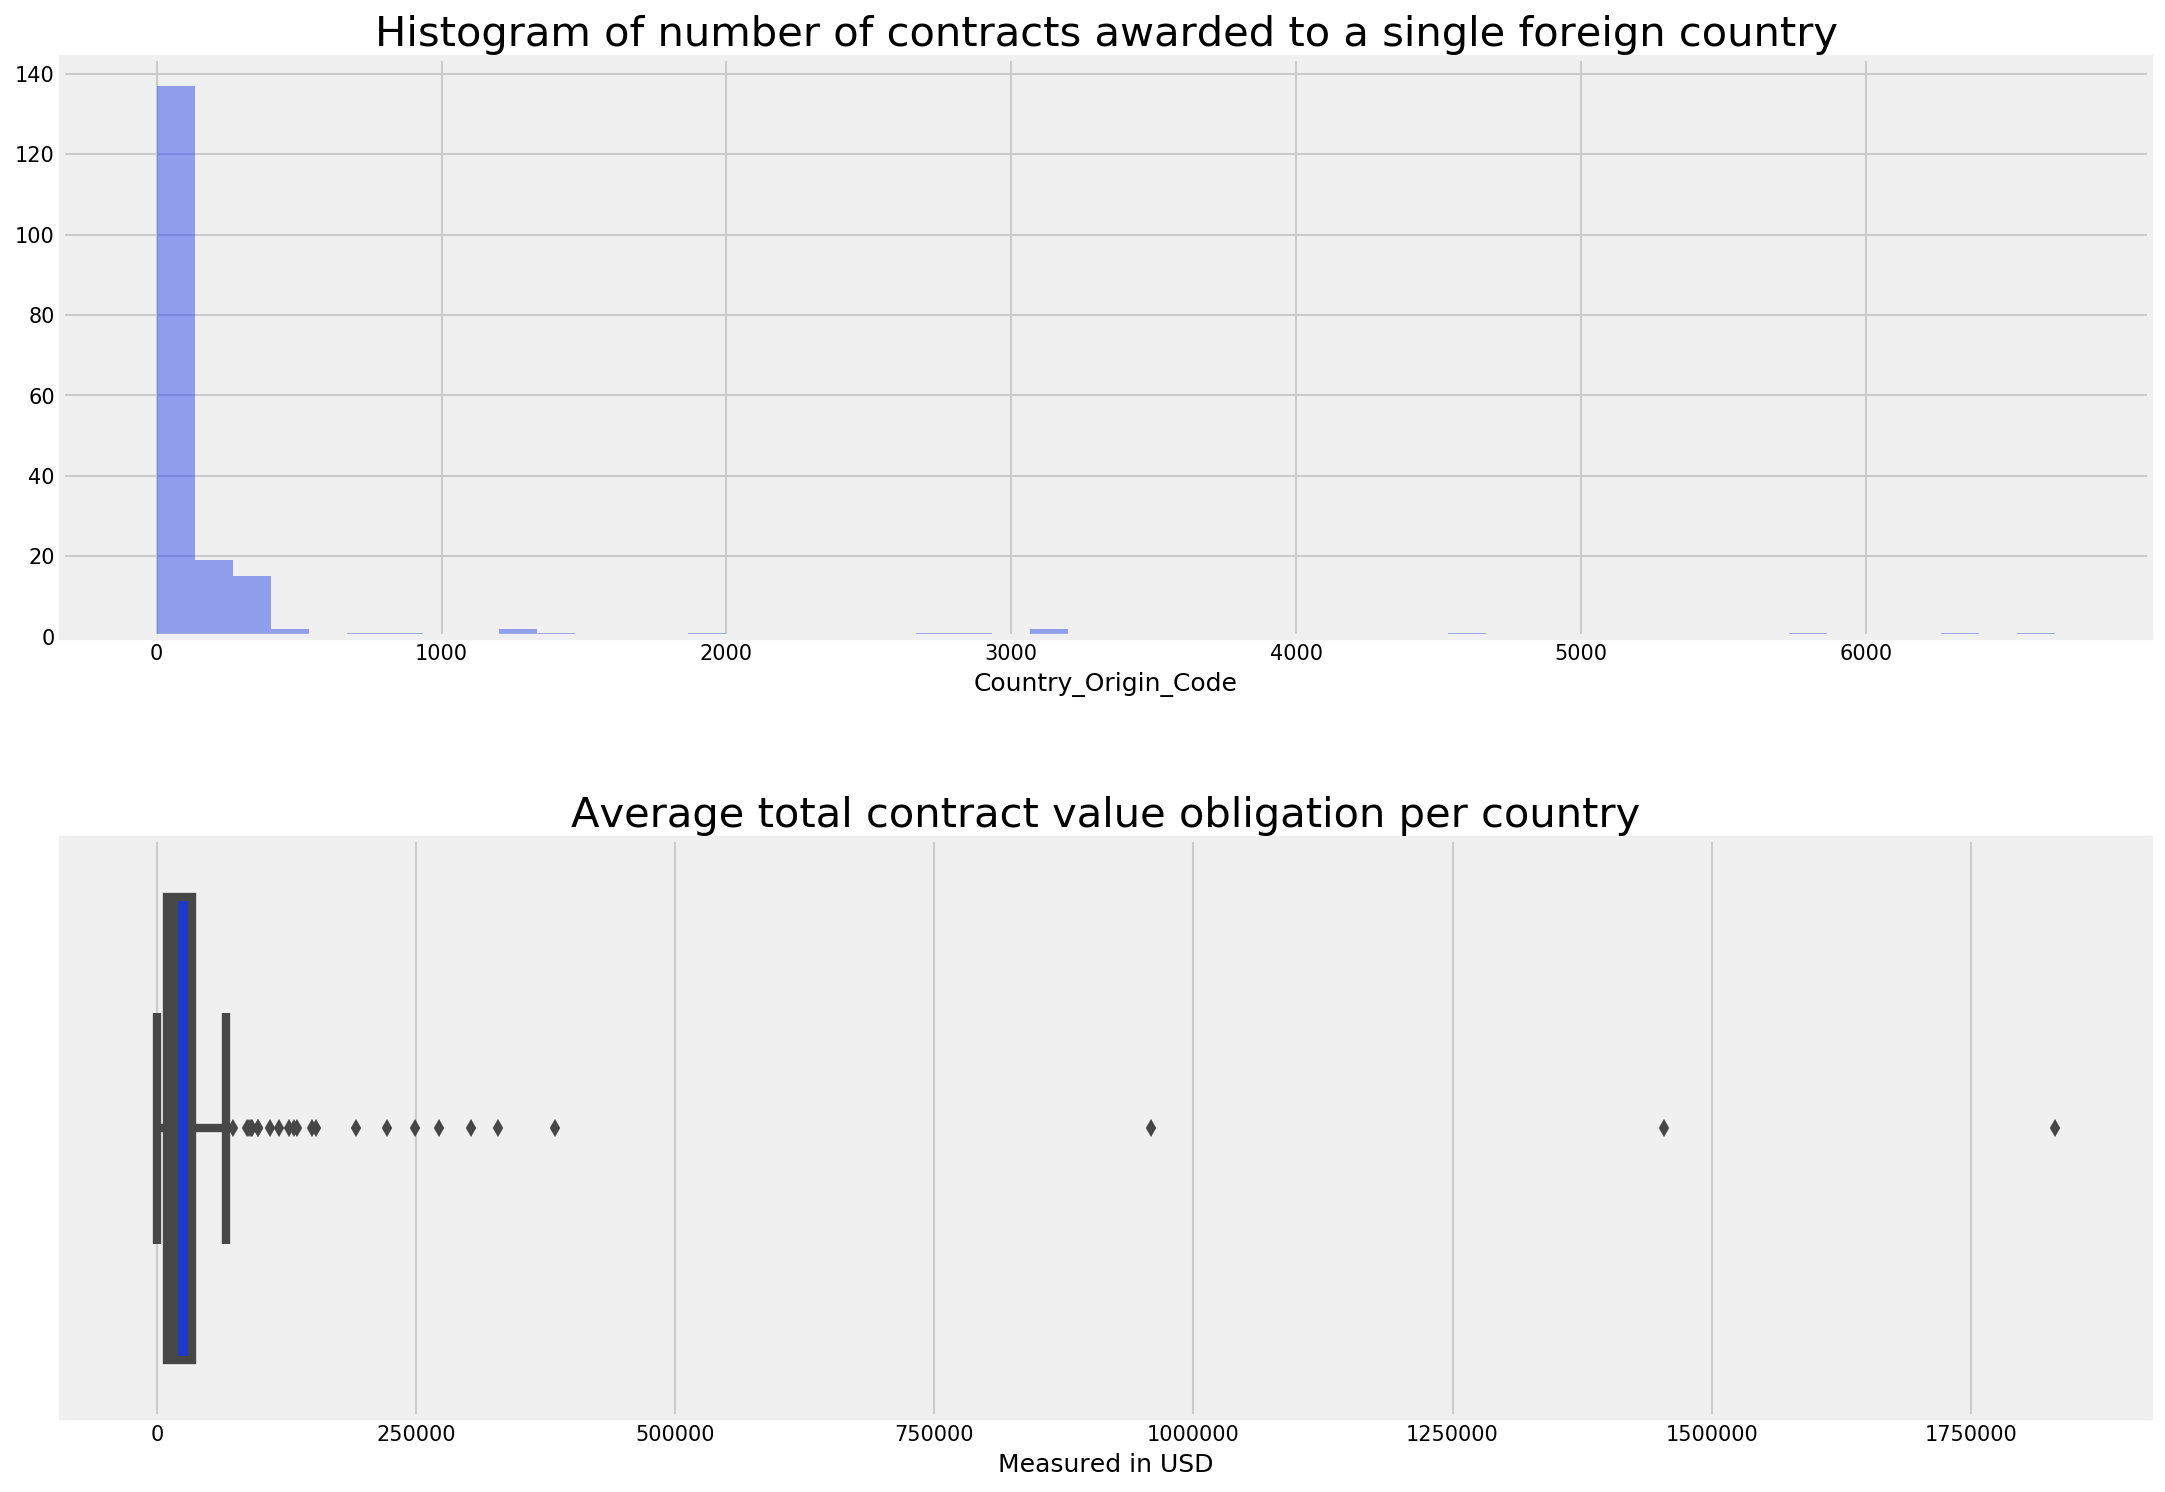

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(16,12), dpi=150)
plt.subplot(211)
sns.distplot(buy['Country_Origin_Code'].value_counts(), kde=False)
plt.title('Histogram of number of contracts awarded to a single foreign country', size=20)
plt.subplot(212)
sns.boxplot(buy.groupby('Country_Origin_Code')['Action_Obligation'].mean())
plt.title("Average total contract value obligation per country", size=20)
plt.xlabel('Measured in USD')
plt.subplots_adjust(hspace=0.35)
plt.show()

#### Notes: Visualizations
The first visualization is merely a histogram of the total number of contracts awarded to a foreign country. It appears that the vast majority of countries (around 175) receive 500 or fewer.

The second visualization is a boxplot, or interquartile representation with outliers, of average contract values. To know more about the right outliers, we can look at the final graph and summary statistic.

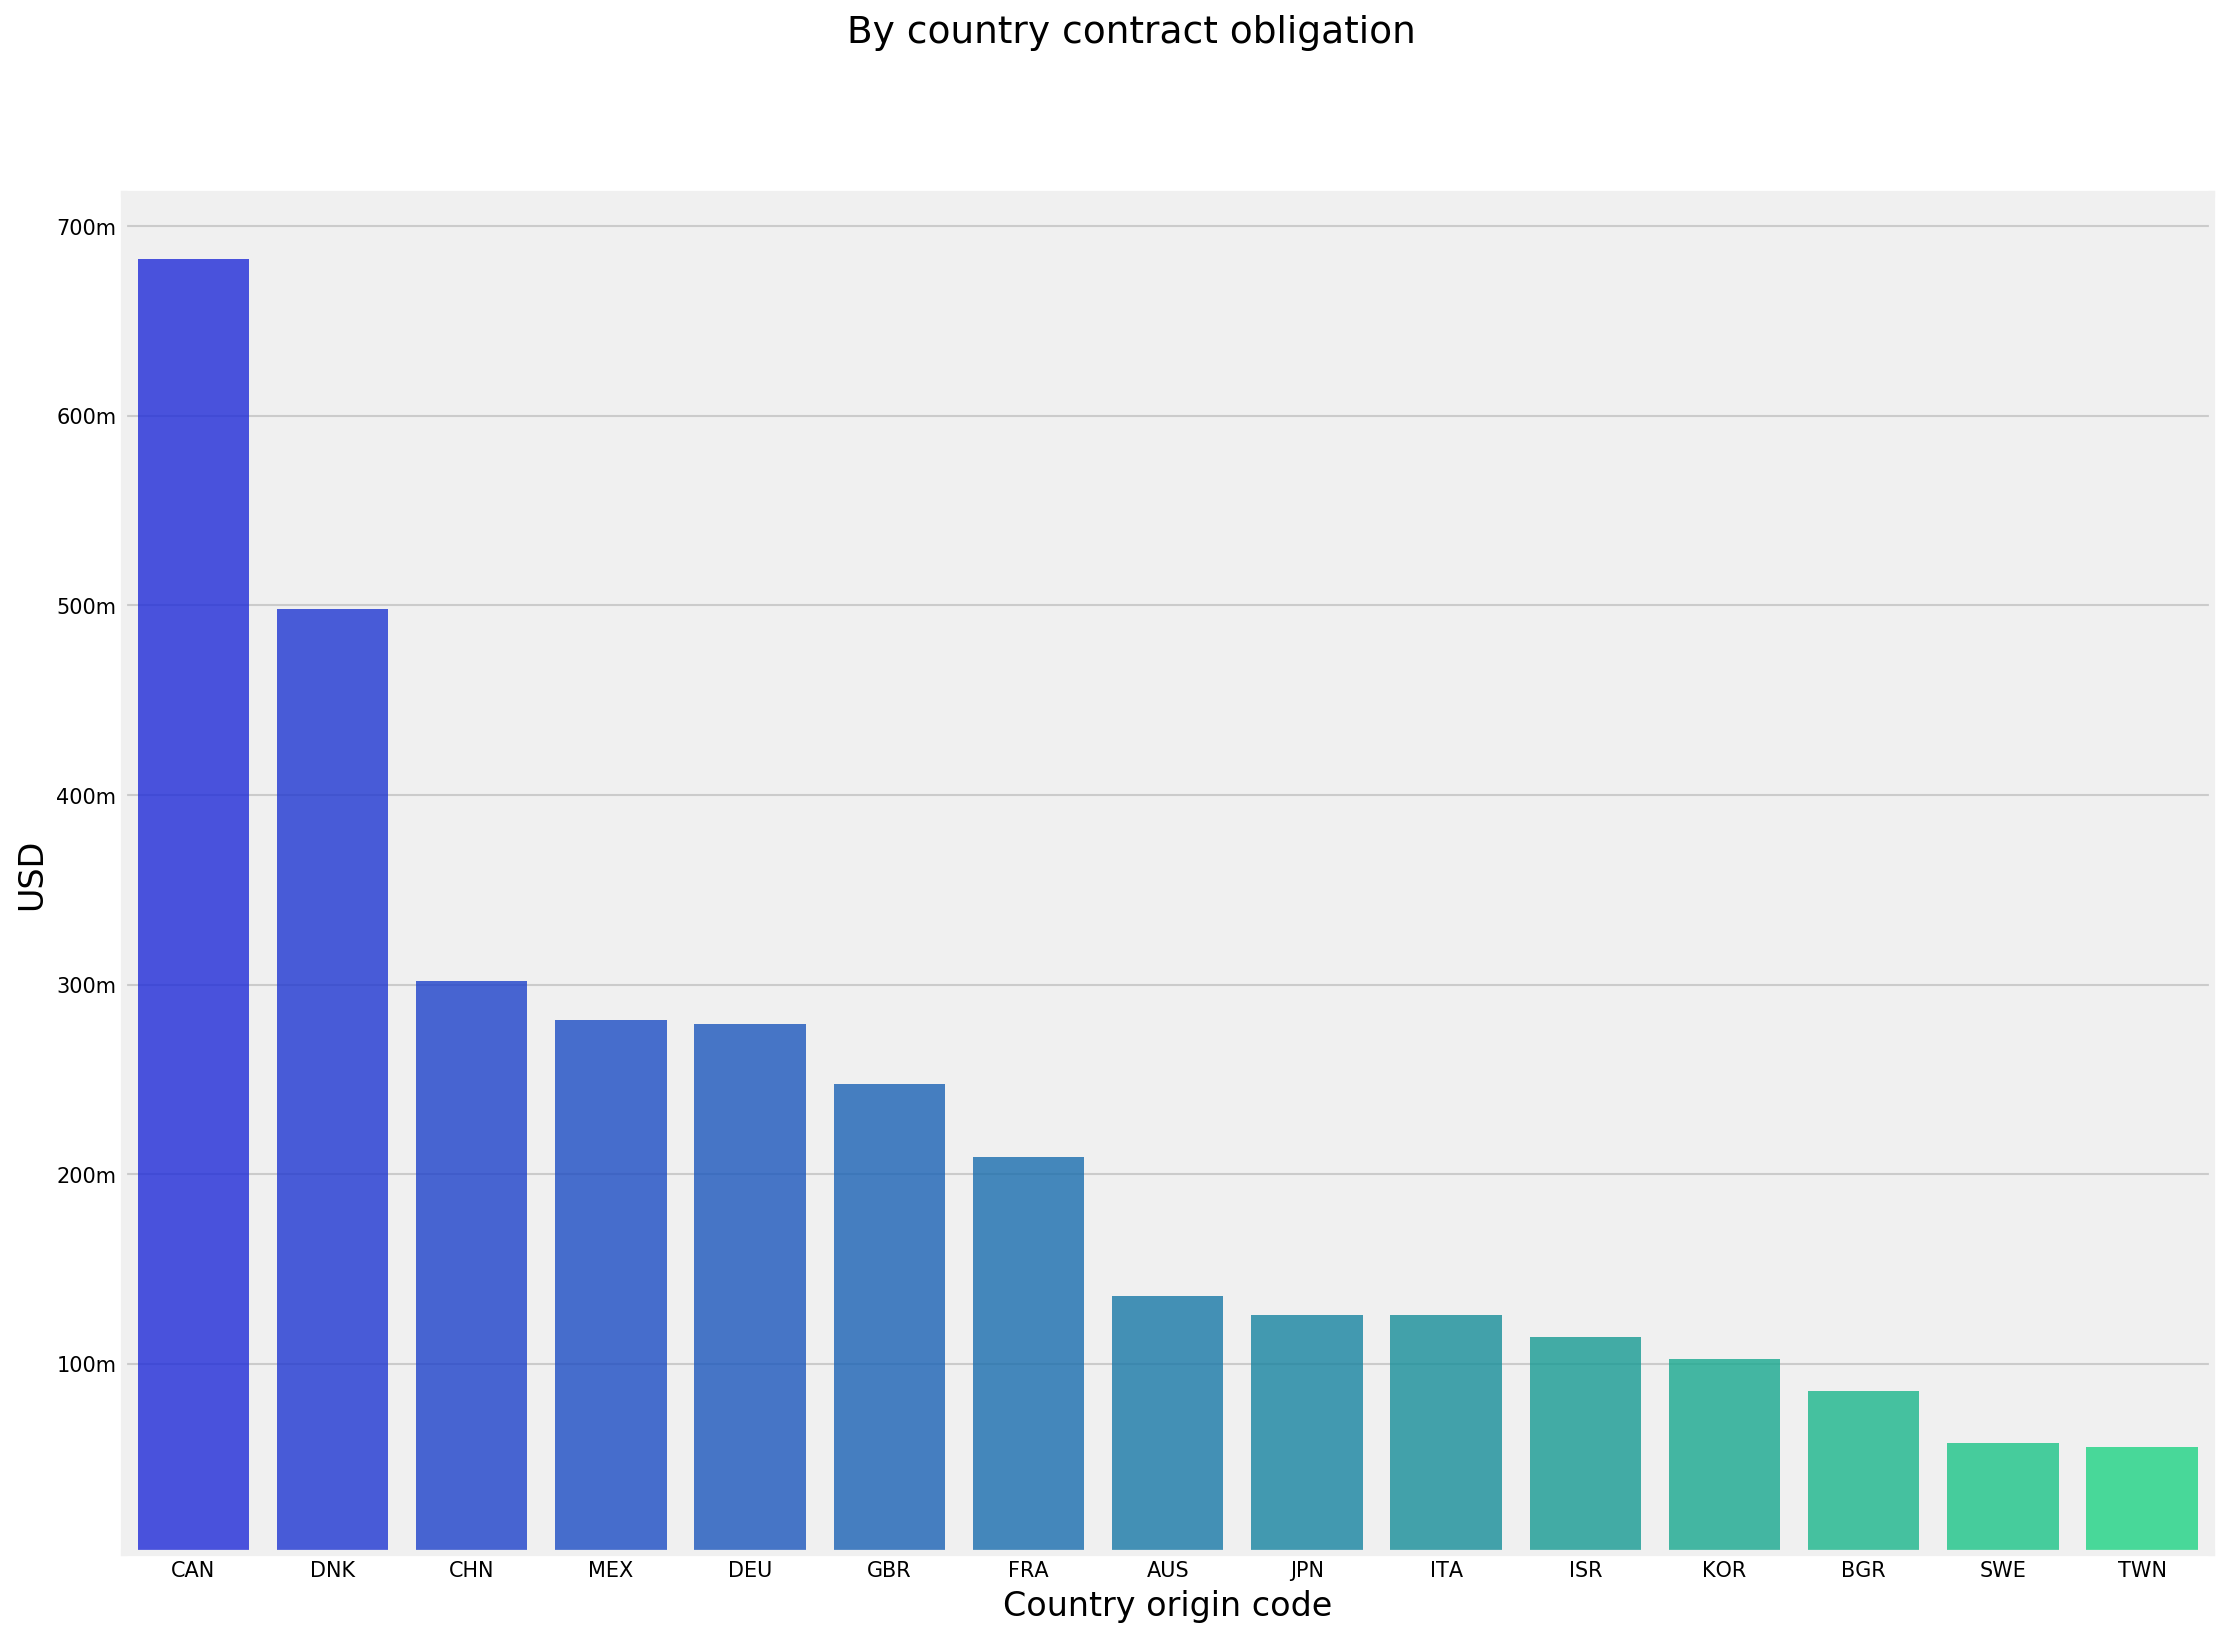

Number of contracts awarded

 CHN    6665
MEX    6273
CAN    5808
FRA    4592
JPN    3162
DEU    3135
KOR    2872
GBR    2719
TWN    1924
ZAF    1387
IND    1310
CHE    1289
ITA     838
SGP     740
MYS     519
Name: Country_Origin_Code, dtype: int64


In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16,12), dpi=150)
fig.suptitle('By country contract obligation', size=18, ha='center')
sums = buy.groupby('Country_Origin_Code')['Action_Obligation'].agg(np.sum).sort_values(ascending=False)[:15]
ax = sns.barplot(x=sums.index, y=sums.values, alpha=0.8, palette='winter')
plt.yticks(np.arange(10**8, 8*10**8, 10**8), ['100m', '200m', '300m', '400m', '500m', '600m', '700m'])
plt.ylabel('USD', size=16)
plt.xlabel('Country origin code', size=16)
plt.show()
print('Number of contracts awarded\n\n', buy['Country_Origin_Code'].value_counts()[:15])

#### Notes: Country barplot
With the barplot below the others, we can see how much federal money for contracts was award to the highest 15 foreign countries in total. This provides some insight when we compare the nations to the list of the top 15 awarded countries, simply by count, listed above. For example, South Africa, Switzerland, and India are on the list of *high* Total Contract Values without making the contract absolute count list. Denmark, Israel, and Australia make the list of *absolute contract count* while not appearing on the total contract value list. This suggests some countries have higher average contract value as they have high total contract obligation values but low contract count - this is indicated as right outliers on this earlier barplot.
#### What can we learn about the industries and companies awarded on this list?

In [13]:
contractsum_country = pd.DataFrame(buy.pivot_table(
    index=['Prod_Service_Desc', 'Country_Origin_Code'], aggfunc=sum)['Total_Contract_Val']).unstack()
contractsum_country.head(3)

Total_Contract_Val          \
Country_Origin_Code                                               ABW     AFG   
Prod_Service_Desc                                                               
ABRASIVE MATERIALS                                                NaN     NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY                  NaN     NaN   
ACCOUNTING AND CALCULATING MACHINES                               NaN     NaN   
ADHESIVES                                                         NaN     NaN   
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN...                NaN  7386.0   

                                                                              \
Country_Origin_Code                                AGO AIA ALB       ARE ARG   
Prod_Service_Desc                                                              
ABRASIVE MATERIALS                                 NaN NaN NaN       NaN NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY   NaN NaN NaN  13663.37 NaN   
ACCOUNTING AND CALCULATING MACHINES                NaN NaN NaN       NaN NaN   
ADHESIVES                                          NaN NaN NaN       NaN NaN   
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN... NaN NaN NaN       NaN NaN   

                                                                         ...  \
Country_Origin_Code                                ARM     ASM       AUS ...   
Prod_Service_Desc                                                        ...   
ABRASIVE MATERIALS                                 NaN     NaN  611763.0 ...   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY   NaN     NaN       NaN ...   
ACCOUNTING AND CALCULATING MACHINES                NaN  9195.0       NaN ...   
ADHESIVES                                          NaN     NaN       NaN ...   
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN... NaN     NaN    6272.7 ...   

                                                                            \
Country_Origin_Code                                VEN VGB VNM WSM XKS XQZ   
Prod_Service_Desc                                                            
ABRASIVE MATERIALS                                 NaN NaN NaN NaN NaN NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY   NaN NaN NaN NaN NaN NaN   
ACCOUNTING AND CALCULATING MACHINES                NaN NaN NaN NaN NaN NaN   
ADHESIVES                                          NaN NaN NaN NaN NaN NaN   
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN... NaN NaN NaN NaN NaN NaN   

                                                                    
Country_Origin_Code                                YEM ZAF ZMB ZWE  
Prod_Service_Desc                                                   
ABRASIVE MATERIALS                                 NaN NaN NaN NaN  
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY   NaN NaN NaN NaN  
ACCOUNTING AND CALCULATING MACHINES                NaN NaN NaN NaN  
ADHESIVES                                          NaN NaN NaN NaN  
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN... NaN NaN NaN NaN  

[5 rows x 187 columns]

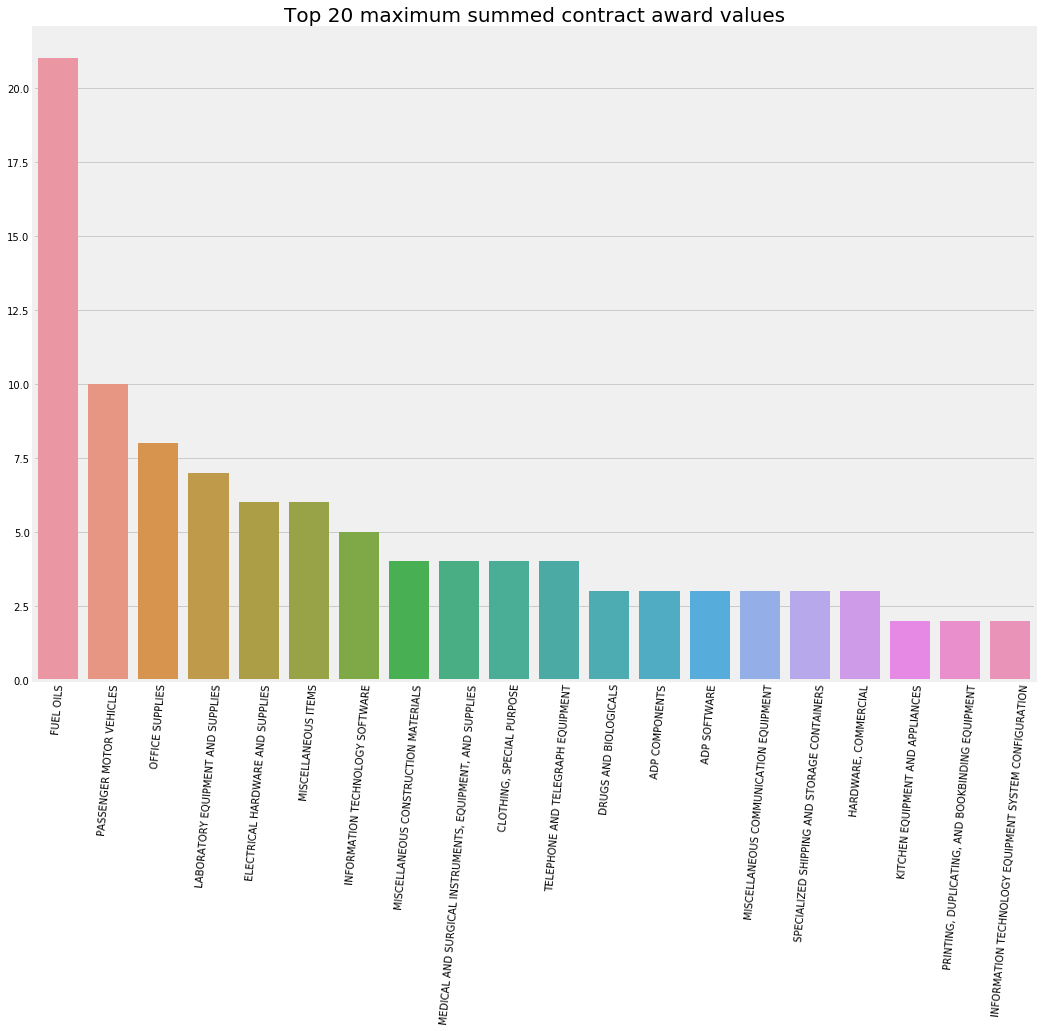

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(16,12))
ax = sns.barplot(x=contractsum_country.idxmax().value_counts()[:20].index, 
                 y=contractsum_country.idxmax().value_counts()[:20].values)
plt.xticks(rotation=85)
plt.title('Top 20 maximum summed contract award values', size=20)
plt.show()

In [52]:
country_prodserv = buy.groupby(['Country_Origin_Code', 'Prod_Service_Desc']).sum()['Action_Obligation']
print(country_prodserv.head(10), '\n')
print(((country_prodserv / country_prodserv.sum(level='Country_Origin_Code')) * 100).describe(), '\n')
print(((country_prodserv / country_prodserv.sum(level='Country_Origin_Code')) * 100).idxmax(), '\n')

Country_Origin_Code  Prod_Service_Desc                                                 
ABW                  ADP SUPPLIES                                                          17178.00
                     MISCELLANEOUS POWER TRANSMISSION EQUIPMENT                             4344.00
                     PETROLEUM PRODUCTION AND DISTRIBUTION EQUIPMENT                         700.82
                     PIPE, TUBE AND RIGID TUBING                                              55.50
AFG                  ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), ANALOG                    7386.00
                     ADP COMPONENTS                                                        14720.00
                     ADP SUPPLIES                                                          67832.07
                     AIR CONDITIONING EQUIPMENT                                            35642.70
                     AMMUNITION MAINTENANCE, REPAIR, AND CHECKOUT SPECIALIZED EQUIPMENT     9022.95
            

In [16]:
country_prodserv = buy.groupby(['Country_Origin_Code', 'Prod_Service_Desc']).sum()['Action_Obligation']
print('Number of negative currency values in data - this is confusing. If low, it will be removed. :',
      len(country_prodserv) - len(country_prodserv[country_prodserv >= 0]), '\n')

pos_cps = country_prodserv[country_prodserv >= 0]
print((pos_cps / pos_cps.sum(level='Country_Origin_Code')).describe(), '\n')
print(pos_cps.head(), '\n')

Number of negative currency values in data - this is confusing. If low, it will be removed. : 0 

count    6541.000000
mean        0.028436
std         0.100652
min         0.000000
25%         0.000198
50%         0.001677
75%         0.011571
max         1.000000
Name: Action_Obligation, dtype: float64 

Country_Origin_Code  Prod_Service_Desc                                  
ABW                  ADP SUPPLIES                                           17178.00
                     MISCELLANEOUS POWER TRANSMISSION EQUIPMENT              4344.00
                     PETROLEUM PRODUCTION AND DISTRIBUTION EQUIPMENT          700.82
                     PIPE, TUBE AND RIGID TUBING                               55.50
AFG                  ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), ANALOG     7386.00
Name: Action_Obligation, dtype: float64 



#### Notes: Summary statistics
These summary statistics show extremes and difficult values in this portion of the transformed data set.

--Notes on logarithmic transformation


C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


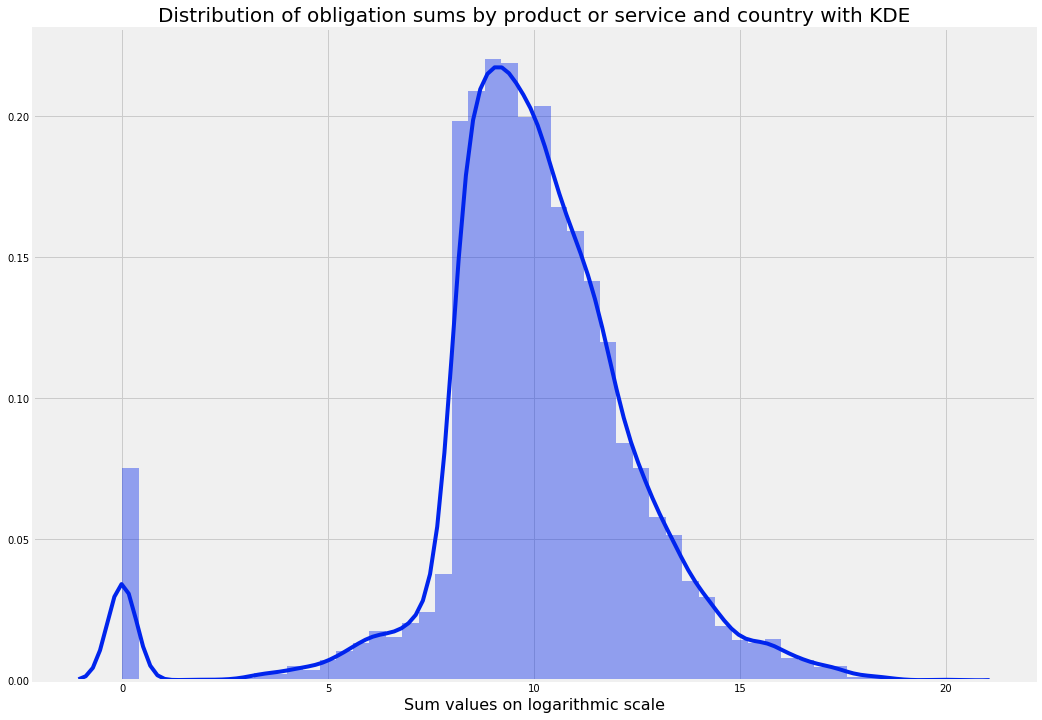

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(16,12))
sns.distplot(np.log(pos_cps + 1)) # +1 to avoid negative infinite values at np.log(0)
plt.title('Distribution of obligation sums by product or service and country with KDE', size=20)
plt.xlabel('Sum values on logarithmic scale', size=16)
plt.show()

#### Notes - logarithmically scaled distribution
hereherehere

In [50]:
pos_cps.sum(level='Country_Origin_Code').sort_values(ascending=False)[:10]

Country_Origin_Code
CAN    6.731709e+08
DNK    4.977747e+08
CHN    2.908461e+08
MEX    2.799670e+08
DEU    2.695027e+08
GBR    2.412432e+08
FRA    2.059839e+08
AUS    1.320000e+08
ITA    1.251798e+08
JPN    1.184035e+08
Name: Action_Obligation, dtype: float64

In [18]:
print(len(buy.groupby(['Funding_Agency', 'DUNS_No']).sum()))
print(len(buy.groupby(['Funding_Agency', 'Vendor_Name']).sum()))
grouped = buy.groupby(['Funding_Agency', 'DUNS_No']).sum()
grouped.head()

10920
11309


NAICS_Code  \
Funding_Agency                            DUNS_No                 
ADVISORY COUNCIL ON HISTORIC PRESERVATION 1818012      999945.0   
AFRICAN DEVELOPMENT FOUNDATION            565409018    846220.0   
AGENCY FOR INTERNATIONAL DEVELOPMENT      5987268      668440.0   
                                          20149303     763360.0   
                                          40928496     522293.0   

                                                     Total_Contract_Val  \
Funding_Agency                            DUNS_No                         
ADVISORY COUNCIL ON HISTORIC PRESERVATION 1818012               4635.22   
AFRICAN DEVELOPMENT FOUNDATION            565409018            35324.99   
AGENCY FOR INTERNATIONAL DEVELOPMENT      5987268             186655.50   
                                          20149303            112308.60   
                                          40928496                 0.00   

                                                     Action_Obligation  
Funding_Agency                            DUNS_No                       
ADVISORY COUNCIL ON HISTORIC PRESERVATION 1818012             11039.22  
AFRICAN DEVELOPMENT FOUNDATION            565409018           35324.99  
AGENCY FOR INTERNATIONAL DEVELOPMENT      5987268            186655.50  
                                          20149303           112308.60  
                                          40928496                0.00

C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


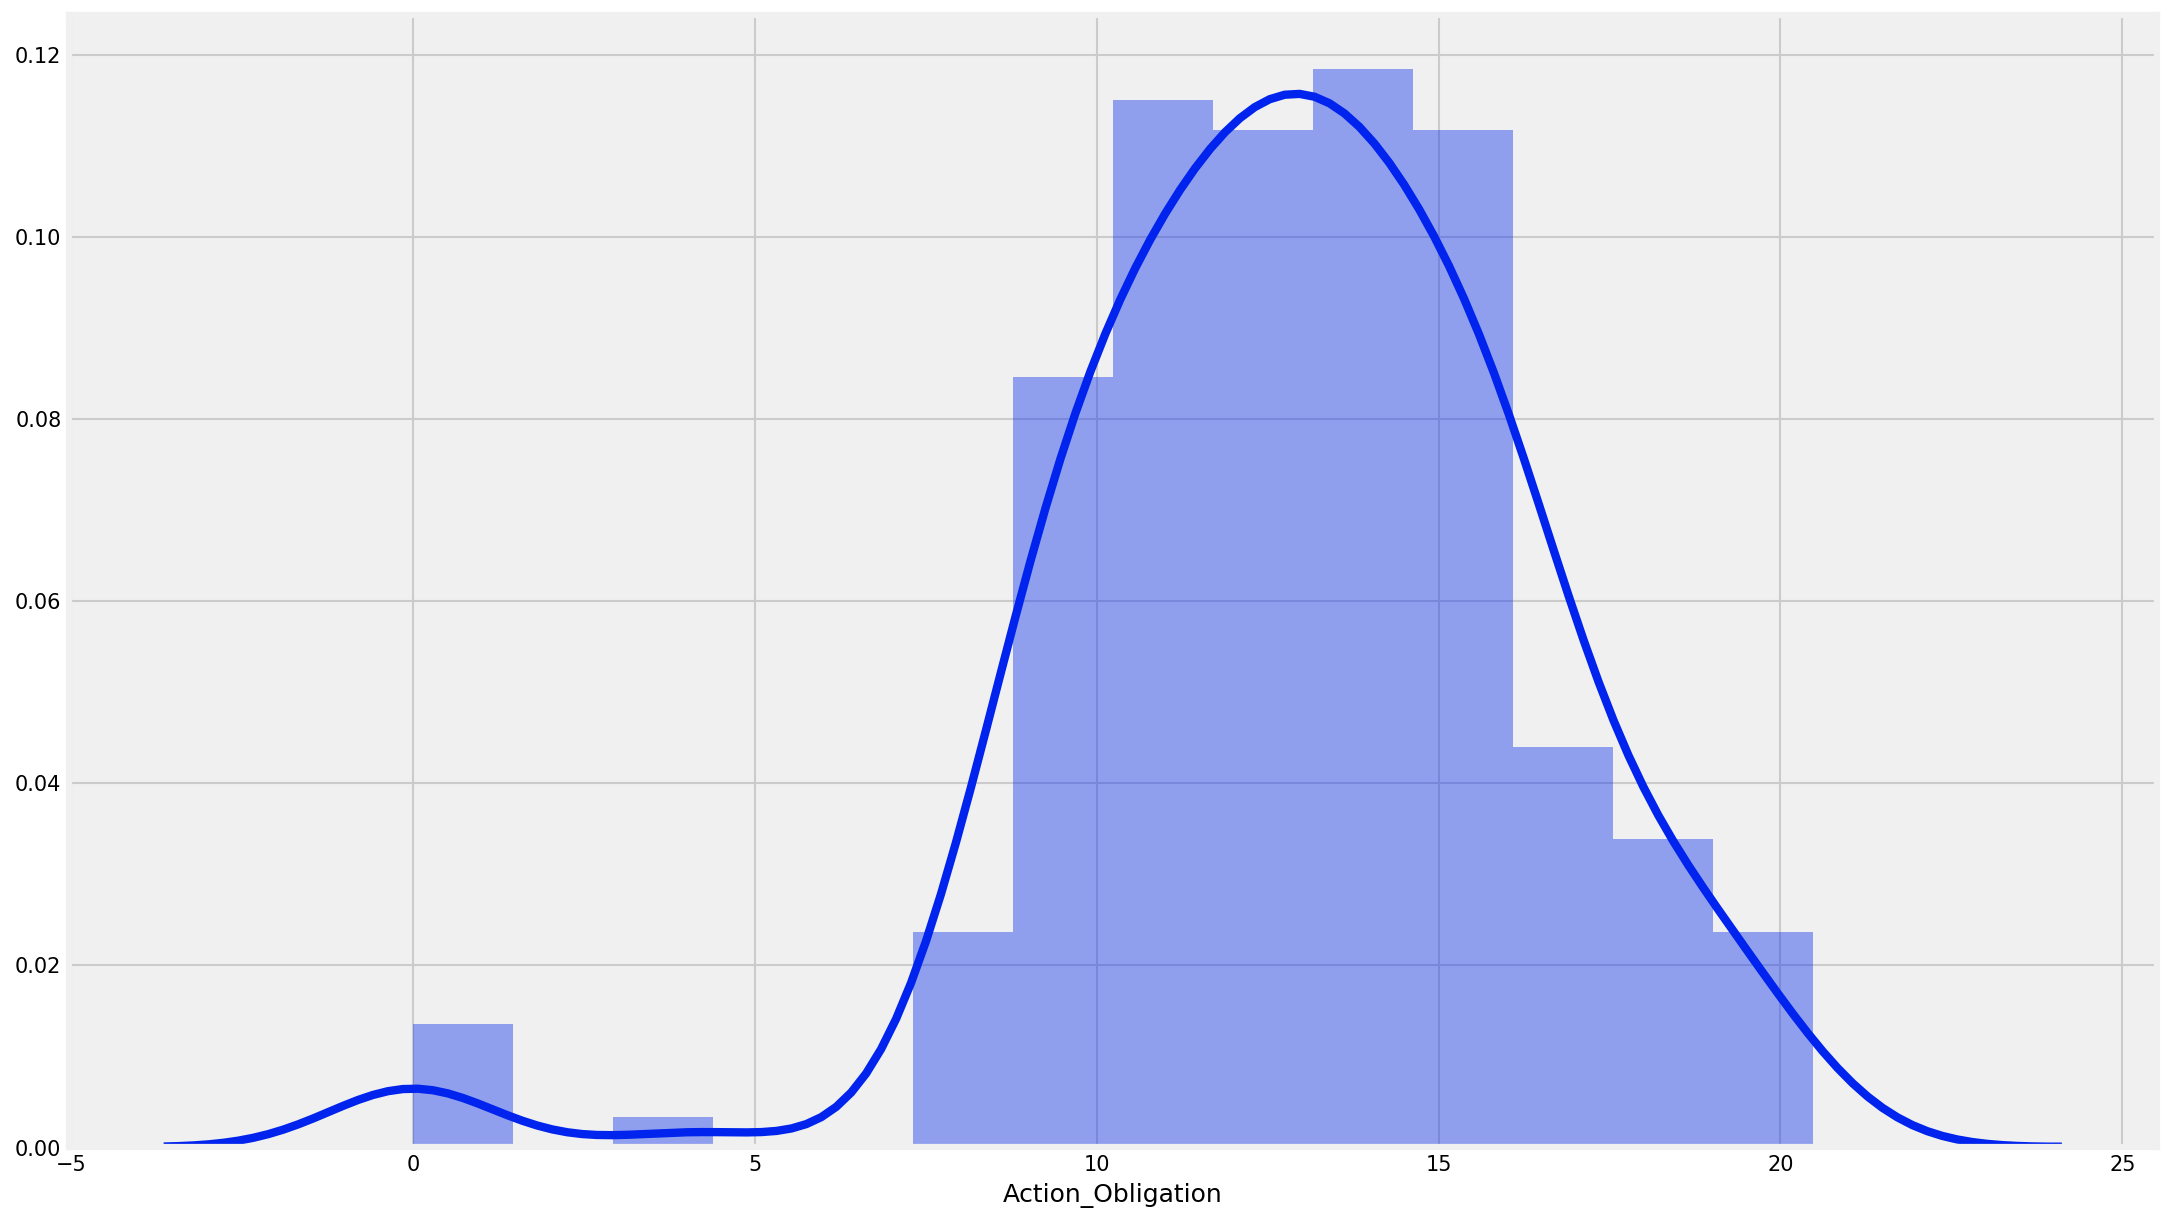

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(16,10), dpi=150)
ax = sns.distplot(np.log(grouped.sum(level='Funding_Agency')['Action_Obligation'] + 1))

In [21]:
grouped2 = buy.groupby(['Funding_Agency', 'DUNS_No']).agg(np.mean)
print(grouped2.info())
grouped2.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10920 entries, (ADVISORY COUNCIL ON HISTORIC PRESERVATION, 1818012) to (WASHINGTON HEADQUARTERS SERVICES (WHS), 220103332)
Data columns (total 3 columns):
NAICS_Code            10900 non-null float64
Total_Contract_Val    10920 non-null float64
Action_Obligation     10920 non-null float64
dtypes: float64(3)
memory usage: 352.2+ KB
None


C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


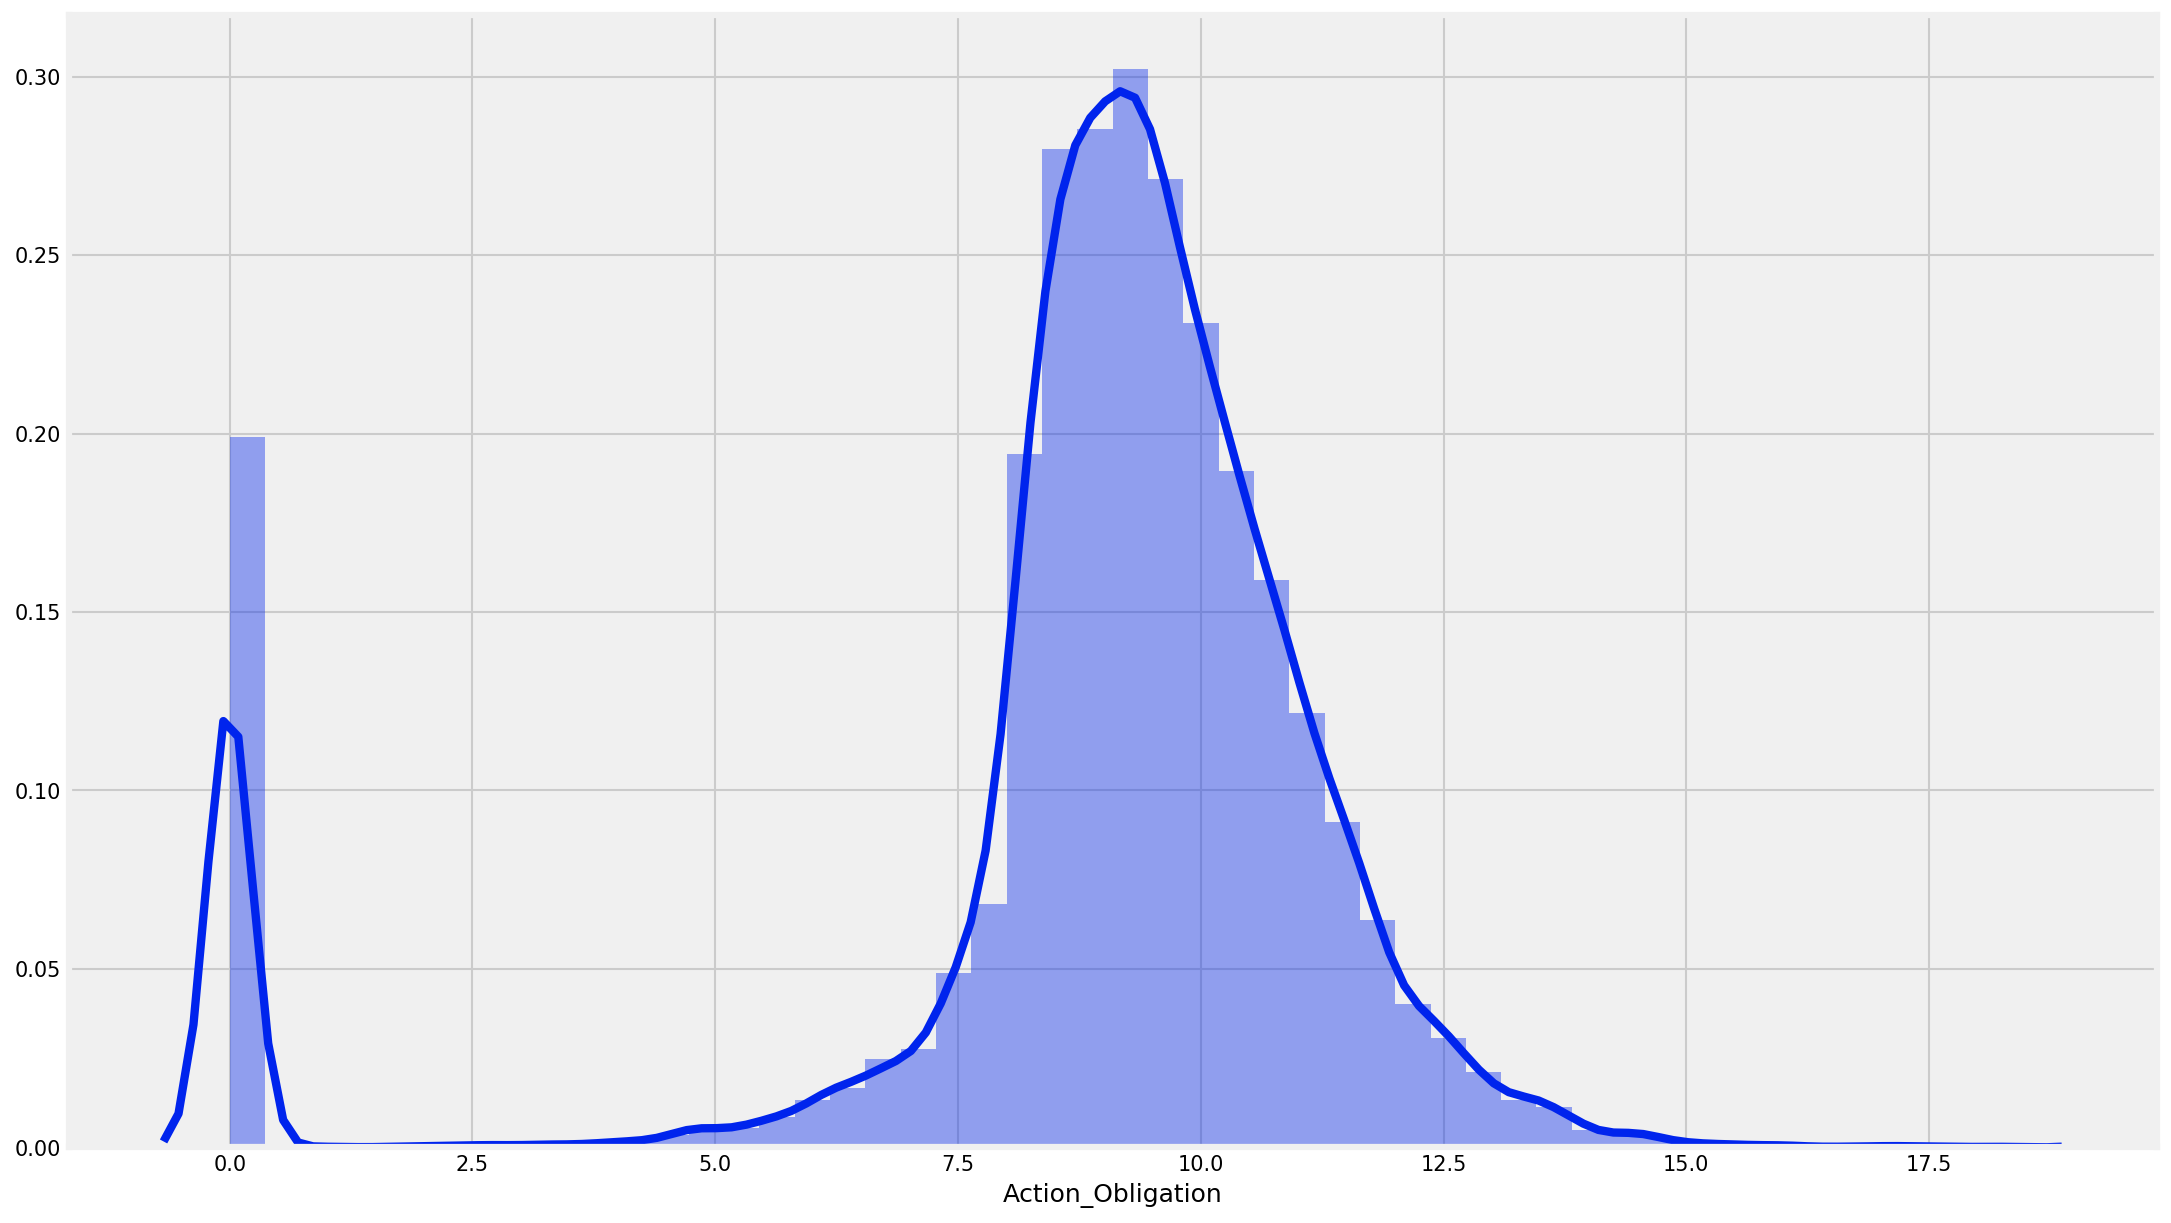

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(16,10), dpi=150)
ax = sns.distplot(np.log(grouped2['Action_Obligation'] + 1))